## K Mean Clustring Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd 
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features= 2, random_state=23) 
#Will get 3 clusters with 2 features
# in clustriung we do not take y into account

In [3]:
X.shape

(1000, 2)

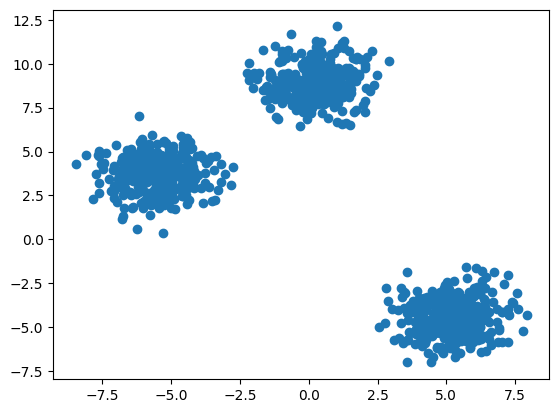

In [4]:
plt.scatter(X[:,0] , X[:,1] )

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
#Manual method - 
## Elbow method to select the K value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Use

In [8]:
## The goal is to find the optimal number of clusters by plotting the WCSSfor each 
# value of k and observing the "elbow" point in the plot

In [9]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585605,
 1181.512560111282,
 992.070850938351,
 856.326912642269,
 770.5081455767627,
 667.7729007673036,
 625.0374264309676,
 536.7638780353469]

In [10]:
# We can see that it is decreasing as k increases 

Text(0, 0.5, 'WCSS')

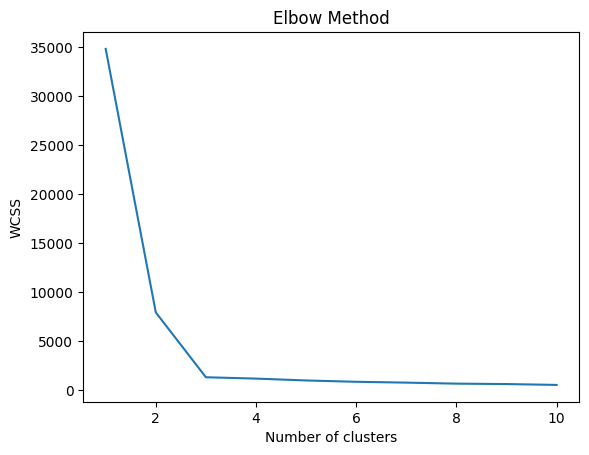

In [11]:
# plot the elbow curve 
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


In [12]:
kmeans = KMeans(n_clusters=k, init ="k-means++")

In [13]:
y_lables = kmeans.fit_predict(X_train)  #Output for Kmeans is the labels for each point in the dataset

In [14]:
y_lables

array([3, 1, 1, 8, 2, 8, 1, 8, 5, 1, 6, 4, 3, 5, 4, 3, 0, 2, 0, 4, 2, 4,
       4, 9, 2, 3, 1, 9, 2, 1, 9, 7, 5, 7, 6, 6, 6, 9, 9, 3, 3, 8, 5, 1,
       9, 0, 0, 3, 7, 1, 3, 4, 3, 5, 1, 1, 5, 6, 7, 7, 3, 5, 9, 1, 6, 4,
       0, 6, 9, 5, 4, 9, 1, 4, 1, 0, 2, 9, 2, 2, 3, 1, 6, 1, 6, 4, 5, 4,
       3, 4, 5, 0, 1, 8, 5, 1, 8, 6, 0, 0, 6, 8, 6, 5, 7, 9, 4, 1, 6, 5,
       9, 6, 1, 7, 9, 8, 7, 6, 5, 4, 1, 5, 4, 2, 1, 7, 5, 4, 8, 2, 1, 7,
       2, 9, 9, 2, 9, 7, 1, 3, 4, 0, 5, 2, 4, 6, 7, 3, 4, 4, 4, 9, 4, 1,
       1, 2, 5, 6, 6, 1, 4, 9, 4, 0, 9, 9, 8, 3, 8, 9, 3, 6, 9, 2, 0, 9,
       6, 3, 4, 7, 6, 2, 3, 9, 2, 7, 6, 3, 4, 9, 1, 0, 8, 5, 3, 0, 6, 1,
       6, 4, 6, 4, 1, 9, 3, 5, 6, 9, 4, 4, 1, 7, 3, 9, 3, 2, 6, 5, 2, 0,
       8, 5, 3, 8, 7, 6, 9, 3, 6, 0, 5, 0, 7, 5, 6, 2, 3, 1, 5, 3, 0, 1,
       1, 2, 5, 4, 0, 8, 1, 7, 5, 3, 7, 9, 2, 1, 4, 4, 7, 2, 7, 0, 0, 3,
       5, 1, 4, 0, 5, 4, 7, 4, 0, 4, 0, 9, 3, 2, 0, 9, 5, 7, 2, 6, 7, 6,
       4, 9, 2, 3, 1, 5, 2, 6, 8, 4, 3, 3, 5, 1, 9,

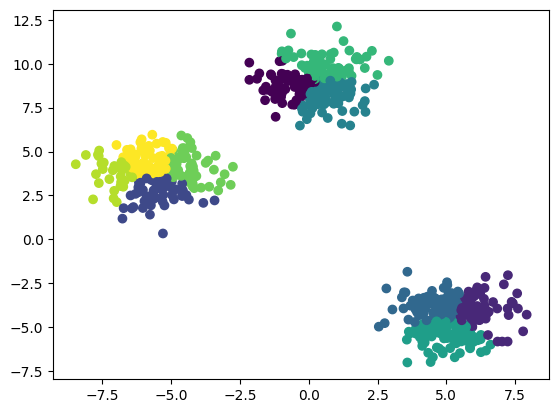

In [15]:
plt.scatter(X_train[:,0] , X_train[:,1] , c=y_lables )

In [16]:
y_test_lables = kmeans.predict(X_test)

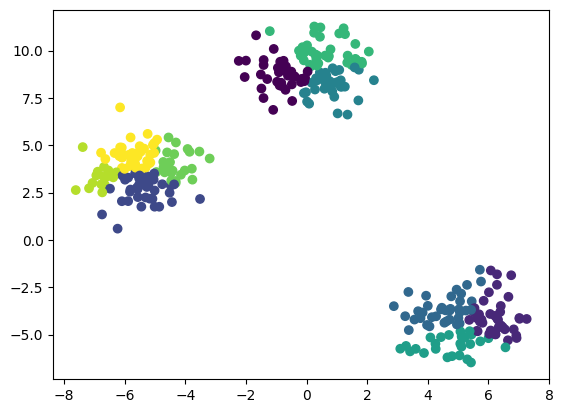

In [17]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_lables)

In [18]:
# WE CAN AUTOMATE ALL THE PROCESS - Knee Locator

In [19]:
from kneed import KneeLocator


In [20]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

In [21]:
## TO calculate Performace we use Silhouette Score
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficient = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficient.append(score)

In [23]:
silhouette_coefficient

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6593671074925262),
 np.float64(0.4763485724139249),
 np.float64(0.34145348255559194),
 np.float64(0.3443858355043091),
 np.float64(0.3431709870797025),
 np.float64(0.3189047387374686),
 np.float64(0.3347064304288855)]

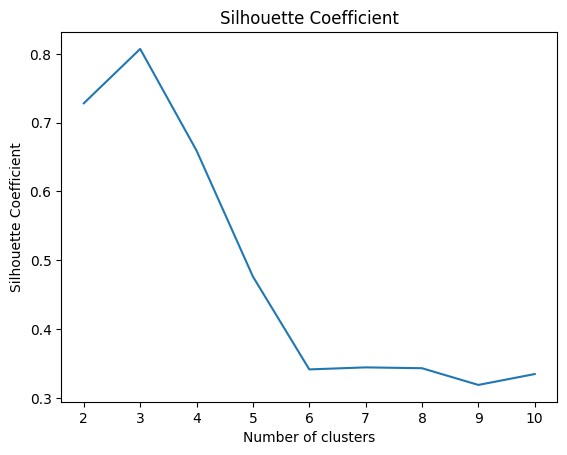

In [24]:
plt.plot(range(2,11), silhouette_coefficient)
plt.title('Silhouette Coefficient')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.xticks(range(2,11))
plt.show()

In [26]:
# for k=3 we have the highest silhouette score as it is more towards 1